## 1. EDA (Exploratory Data Analysis)

### 1.1 Importing Libraries and Dataset

In [ ]:
import pandas as pd #Used for dataframe manipulations and functions
import seaborn as sns #Used for plotting and graphs in visualisation
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt #Used for plotting and graphs in visualisation
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
#Loading dataset
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
#Checking dataset
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Metadata

CustomerID: This columns consists of only unique values and is the customer identifier column in the mall dataset. <br>
Gender: This specifies the gender or sex of the customer, being either male or female.<br>
Age: This column shows the age of the specific customer in years.<br>
Annual Income: This depicts the annual income of the customer in 1000's dollar. If value is 16, it means the customer earns 16,000 dollars annualy.<br>
Spending Score: This is a metric given by the mall itself based on customer behavior and value and other internal metrics.

In [ ]:
#Checking data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Checking Summary of dataset
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


#### General Overview:

The dataset contains 200 entries with information about CustomerID, Gender, Age, Annual Income, and Spending Score. The total number of rows being 200 shows that their are no null values in the dataset.<br>

#### Gender Distribution:
There are two genders represented: Male and Female.<br>
The majority of customers are Female (112 out of 200, or 56%), while Male customers make up the remaining 88 (44%).<br>

#### Age:

Mean Age: 38.85 years. This indicates that most customers are middle-aged.<br>
Age Range: The youngest customer is 18 years old, and the oldest is 70 years old.<br>
Standard Deviation: 13.97, showing a moderate spread in the ages.<br>

Age Quartiles:<br>
25% of customers are younger than 28.75 years.<br>
50% of customers are younger than 36 years.<br>
75% of customers are younger than 49 years.<br>

#### Annual Income:

Mean Annual Income: 60.56k dollars.<br>
Income Range: The lowest annual income is 15k dollars, and the highest is 137k dollars.<br>
Standard Deviation: 26.26, showing a wide variance in customers' income levels.<br>

Income Quartiles:<br>
25% of customers have an income below 41.5k dollars.<br>
50% of customers have an income below 61.5k dollars.<br>
75% of customers have an income below 78k dollars.<br>

#### Spending Score:

Mean Spending Score: 50.2, indicating an average spending behavior overall.<br>
Score Range: The lowest score is 1, and the highest score is 99, showing a broad spectrum of spending behavior.<br>
Standard Deviation: 25.82, reflecting significant variability in spending habits.<br>

Score Quartiles:<br>
25% of customers have a Spending Score lower than 34.75.<br>
50% of customers have a Spending Score lower than 50.<br>
75% of customers have a Spending Score lower than 73.<br>

#### Key Observations:

<b>Income-Score Variability:</b> There's a wide range in both income and spending scores, suggesting diverse financial backgrounds and consumer behaviors.<br>
<b>Spending Trends:</b> With the mean spending score being close to 50, half of the customers are moderate spenders, while others either spend significantly more or less.<br>
<b>Target Groups:</b> Customers below 30 years of age or above 60 may exhibit distinct spending behaviors, making them interesting target groups for further segmentation or marketing strategies.

### 1.2 RENAMING COLUMNS

In [ ]:
#Renaming two columns for easier use
df.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### 1.3 OUTLIER DETECTION

In [ ]:
# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers, z_scores


# Columns to check for outliers
columns_to_check = ['Age', 'Annual Income', 'Spending Score']

# Detect outliers
for column in columns_to_check:
    print(f"\nChecking outliers in {column}:")

    # Detect outliers
    outliers, z_scores = detect_outliers_zscore(df, column)

    if not outliers.empty:
        print(f"Outliers detected in {column}:")
        print(outliers[[column]])
        print(f"Number of outliers: {len(outliers)}")
        print("Indices of outlier rows:")
        print(outliers.index.tolist())
        print("Z-scores of outliers:")
        print(z_scores[outliers.index])
    else:
        print(f"No outliers detected in {column}.")


Checking outliers in Age:
No outliers detected in Age.

Checking outliers in Annual Income:
No outliers detected in Annual Income.

Checking outliers in Spending Score:
No outliers detected in Spending Score.


No outliers detected thus no treatment required.

### 1.4 VARIABLE ANALYSIS

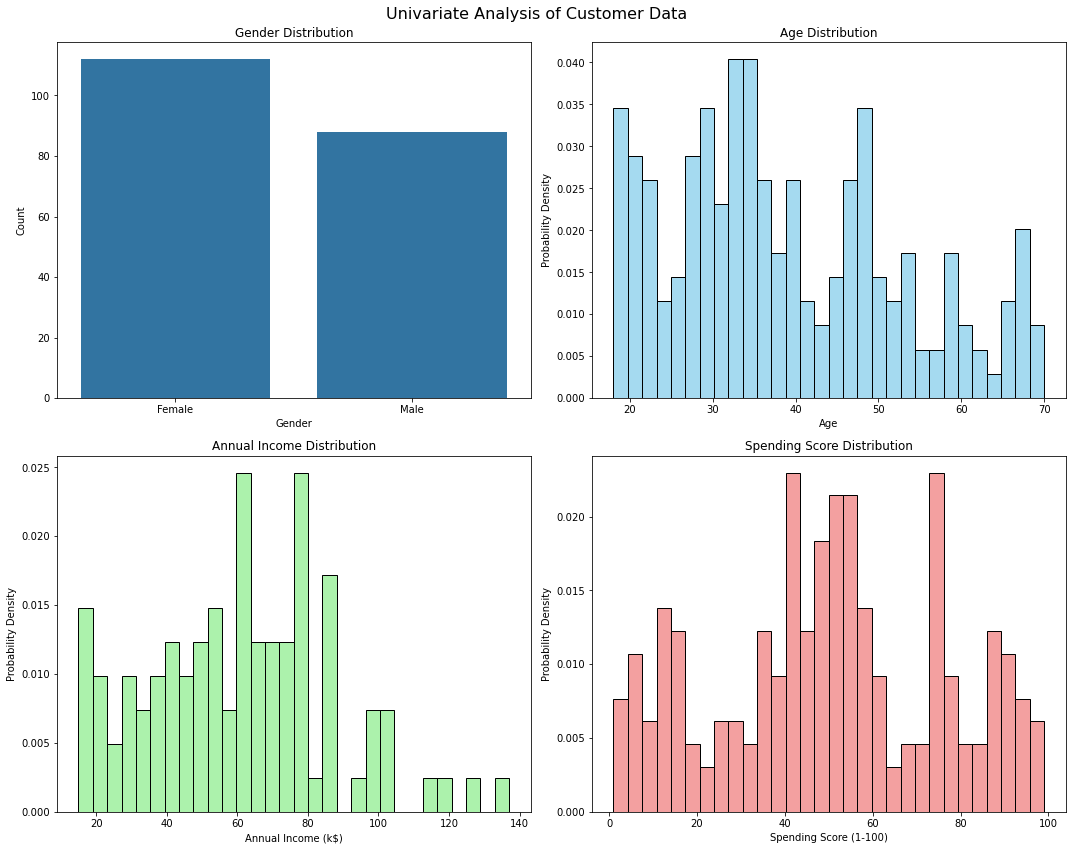

In [ ]:
# Set up the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Univariate Analysis of Customer Data', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# 1. Gender Distribution (Bar Plot)
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_ylabel('Count')

# 2. Age Distribution (Histogram)
sns.histplot(df['Age'], bins=30, ax=axes[1], color='skyblue', stat='density')
axes[1].set_title('Age Distribution')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Probability Density')

# 3. Annual Income Distribution (Histogram)
sns.histplot(df['Annual Income'], bins=30, ax=axes[2], color='lightgreen', stat='density')
axes[2].set_title('Annual Income Distribution')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Probability Density')

# 4. Spending Score Distribution (Histogram)
sns.histplot(df['Spending Score'], bins=30, ax=axes[3], color='lightcoral', stat='density')
axes[3].set_title('Spending Score Distribution')
axes[3].set_xlabel('Spending Score (1-100)')
axes[3].set_ylabel('Probability Density')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Customer Demographics
Gender: The dataset shows a roughly equal distribution between male and female customers. This balanced gender ratio means marketing and sales strategies can be designed to appeal equally to both genders, without bias toward one group.

Age: Most customers fall within the 30-50 age group, with a slight concentration around the 30-35 range. This suggests that the business primarily caters to middle-aged individuals, likely in their working years or approaching retirement. Products or services targeted toward this demographic would likely perform well.

Annual Income: The annual income distribution shows that most customers fall within the 40k-80k range, suggesting a middle-income audience. The bimodal peaks at around 60k and 80k indicate there may be two dominant income segments.

Spending Score: The bimodal distribution of spending scores indicates two distinct groups—high spenders and low spenders. This points to a potential need for tailored marketing strategies for each group, such as premium offerings for high spenders and budget-friendly options for low spenders.

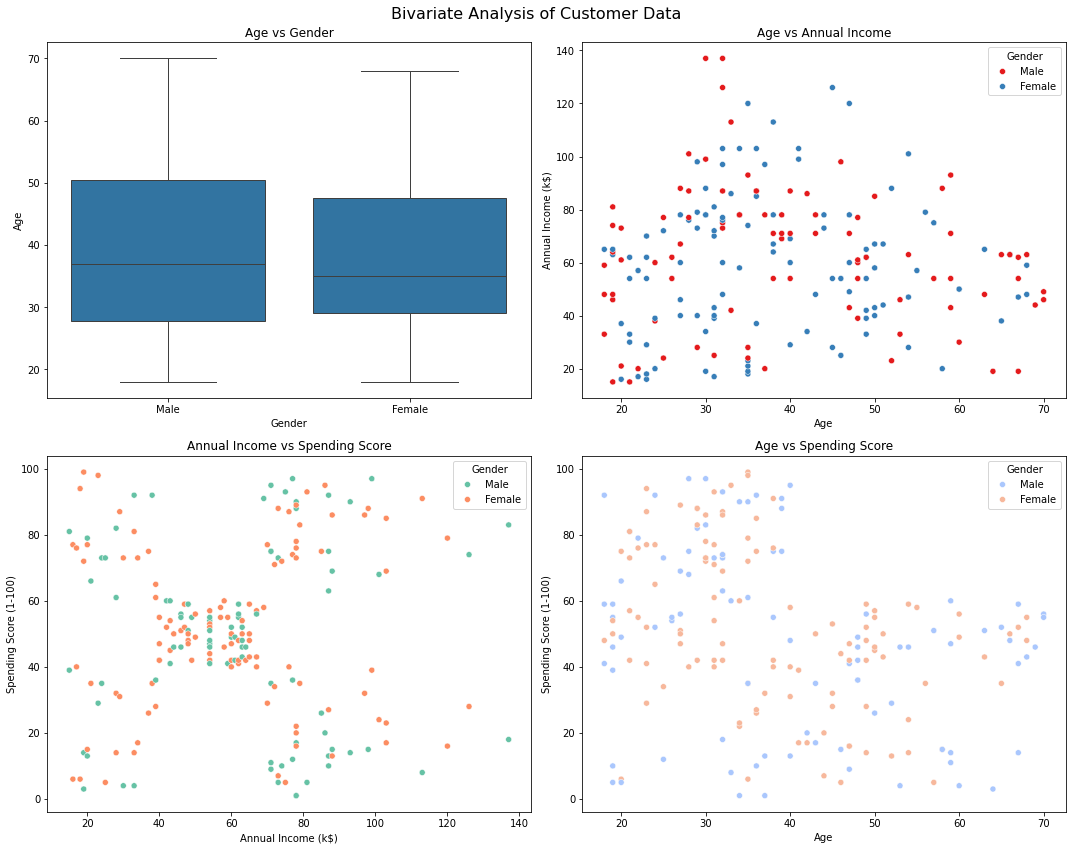

In [ ]:
# Set up the subplot grid for bivariate analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Bivariate Analysis of Customer Data', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# 1. Gender vs Age (Box Plot)
sns.boxplot(x='Gender', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age vs Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Age')

# 2. Age vs Annual Income (Scatter Plot)
sns.scatterplot(x='Age', y='Annual Income', data=df, hue='Gender', palette='Set1', ax=axes[1])
axes[1].set_title('Age vs Annual Income')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Annual Income (k$)')

# 3. Annual Income vs Spending Score (Scatter Plot)
sns.scatterplot(x='Annual Income', y='Spending Score', data=df, hue='Gender', palette='Set2', ax=axes[2])
axes[2].set_title('Annual Income vs Spending Score')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')

# 4. Age vs Spending Score (Scatter Plot)
sns.scatterplot(x='Age', y='Spending Score', data=df, hue='Gender', palette='coolwarm', ax=axes[3])
axes[3].set_title('Age vs Spending Score')
axes[3].set_xlabel('Age')
axes[3].set_ylabel('Spending Score (1-100)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

No Strong Correlations: Across the four charts, there are no strong correlations between age, gender, income, and spending score. This suggests that demographic features like age and income are not good predictors of spending behavior, meaning segmentation and marketing strategies should focus more on behavioral data rather than demographic factors.

Segmentation by Behavior: Since income and age don’t significantly influence spending patterns, segmentation should be based on actual spending habits rather than demographic data. This allows for more personalized offers based on how much customers spend, rather than their income or age bracket.

Targeting Younger High-Spending Customers: There is a mild tendency for younger customers to spend more, as shown in the age vs. spending score plot. This could indicate an opportunity to target younger demographics with high-spending behaviors, especially through promotions and loyalty incentives.

Balanced Gender Distribution: Gender does not strongly affect age, income, or spending score, implying that gender-neutral marketing strategies are appropriate. There's no need to differentiate based on gender for these variables.

The bivariate analysis suggests that customer spending behavior (represented by spending score) is the most critical feature for segmentation and targeted marketing, as it does not strongly correlate with demographics like age or income. Therefore, businesses should focus on customer purchase behavior patterns rather than demographic data for creating effective marketing campaigns and product recommendations.

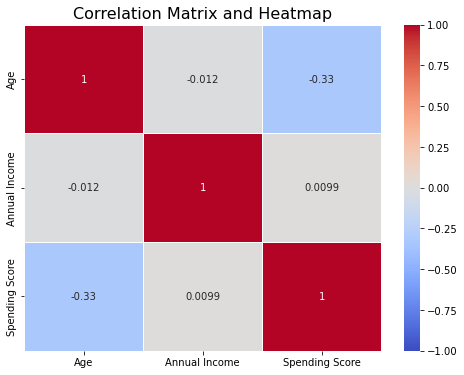

In [ ]:
# Compute the correlation matrix for numerical columns
corr_matrix = df[['Age', 'Annual Income', 'Spending Score']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0, vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Matrix and Heatmap', fontsize=16)

# Display the heatmap
plt.show()

Age vs. Annual Income: Correlation = 0.012

Insight: There is almost no correlation between age and annual income. This suggests that a customer’s income is independent of their age in this dataset.
Implication: Age is not a good predictor of a customer's income, meaning income-targeted strategies shouldn't rely on age segmentation. For example, higher-income products can't be targeted at younger or older groups based on this relationship.

Age vs. Spending Score: Correlation = -0.33

Insight: There is a weak negative correlation between age and spending score. As age increases, the spending score tends to decrease slightly, but not significantly.
Implication: Younger customers tend to spend more, which could indicate that they are more responsive to promotions or new offerings. On the other hand, older customers may prefer value-oriented products or services. However, since the correlation is weak, age alone is not a strong predictor of spending behavior.
Marketing Strategy: Younger customers could be targeted with dynamic, high-value offers, while older customers could benefit from long-term loyalty programs.

Annual Income vs. Spending Score: Correlation = -0.009

Insight: There is no meaningful correlation between annual income and spending score. This means that how much a customer earns does not determine their spending habits in the dataset.
Implication: Customers across all income levels have varied spending behaviors. High-income customers are not necessarily high spenders, and low-income customers can still spend a lot. Therefore, segmentation based solely on income levels will not be effective.
Marketing Strategy: It's better to focus on actual spending behaviors (such as high-spenders vs. low-spenders) rather than income-based segmentation. Personalized offers should be driven by customer purchasing history instead of income assumptions.

### 1.5 STANDARDISATION AND PCA

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Step 1: Label Encoding for categorical features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Encode 'Gender' column

# Step 2: Drop the 'CustomerID' column since it's not needed for clustering
df.drop('CustomerID', axis=1, inplace=True)


In [ ]:
# Step 3: Standardizing the features before PCA
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Age', 'Annual Income', 'Spending Score', 'Gender']])

# Step 4: Apply PCA (optional, depending on how many components you want)
pca = PCA(n_components=2)  # Reducing to 2 components for visualization purposes
pca_data = pca.fit_transform(scaled_df)

## 2. K-Means Algorithm



### 2.1 Importing Libraries

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances

### 2.2 Clusters Determination

In [ ]:
def dunn_index(pca_data, labels):
    # Calculate pairwise distances between all points
    distances = pairwise_distances(pca_data)

    # Initialize variables to store inter-cluster distance and intra-cluster distance
    intra_cluster_dists = []
    inter_cluster_dists = []

    # Iterate through all unique clusters
    unique_labels = np.unique(labels)

    for label in unique_labels:
        # Get the points in the current cluster
        cluster_points = pca_data[labels == label]

        # Calculate intra-cluster distances (max distance within the cluster)
        if len(cluster_points) > 1:
            intra_cluster_dist = np.max(pairwise_distances(cluster_points))
            intra_cluster_dists.append(intra_cluster_dist)

        # Calculate inter-cluster distances (min distance between different clusters)
        for other_label in unique_labels:
            if label != other_label:
                other_cluster_points = pca_data[labels == other_label]
                inter_cluster_dist = np.min(pairwise_distances(cluster_points, other_cluster_points))
                inter_cluster_dists.append(inter_cluster_dist)

    # Dunn Index = min(inter-cluster distance) / max(intra-cluster distance)
    return np.min(inter_cluster_dists) / np.max(intra_cluster_dists)

#Indices for all three evaluation metrics
davies_bouldin_indices = []
dunn_indices = []
silhouette_indices = []

#Model Evaluation
from sklearn.metrics import silhouette_score
# to find optimum k value
for n_clusters in range(2, 13):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, labels)
    silhouette_indices.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the Silhouette Score is {silhouette_avg}")
    dunn = dunn_index(pca_data,labels)
    dunn_indices.append(dunn)
    print("Dunn Index:", dunn)
    # Calculate the Davies-Bouldin Index for the current clustering
    db_index = davies_bouldin_score(pca_data, labels)
    davies_bouldin_indices.append(db_index)
    # Print the Davies-Bouldin Index for this k
    print(f"Davies-Bouldin Index: {db_index}")
    print("_"*50)

For n_clusters = 2, the Silhouette Score is 0.4013999566327566
Dunn Index: 0.06074023060114688
Davies-Bouldin Index: 1.0173464021781182
__________________________________________________
For n_clusters = 3, the Silhouette Score is 0.36814645096471177
Dunn Index: 0.020357953168786993
Davies-Bouldin Index: 0.8440363112920949
__________________________________________________
For n_clusters = 4, the Silhouette Score is 0.4123205400764094
Dunn Index: 0.02904405637478368
Davies-Bouldin Index: 0.7883061238232457
__________________________________________________
For n_clusters = 5, the Silhouette Score is 0.403768937247468
Dunn Index: 0.053784474647984463
Davies-Bouldin Index: 0.8469946082836604
__________________________________________________
For n_clusters = 6, the Silhouette Score is 0.4032217492552414
Dunn Index: 0.025505468377236305
Davies-Bouldin Index: 0.819906083294477
__________________________________________________
For n_clusters = 7, the Silhouette Score is 0.3776210944314553


For n_clusters = 4, the clusters are slightly better because:

The silhouette score (0.4123205400764094) is higher, which means the clusters are more distinct and well-defined.
The Davies-Bouldin index (0.7883061238232457) is lower, suggesting the clusters are tighter and more separated.

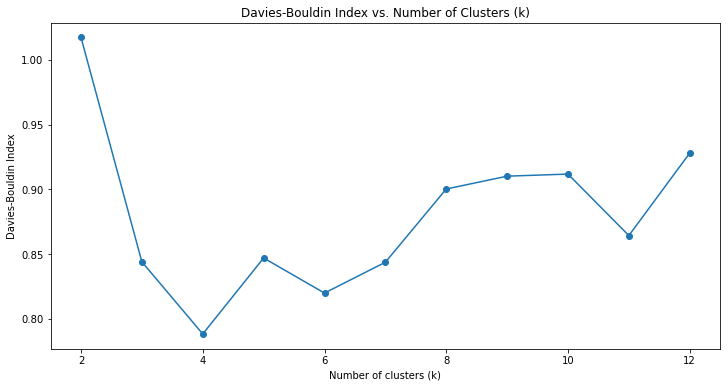

In [ ]:
n_clusters = list(range(2, 13))  # This creates a list from 2 to 12
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

The Davies-Bouldin index is lower at k=4, which indicates that the clusters are more compact (tighter) within themselves and have a greater separation from each other. This suggests that the points within each cluster are more similar to each other, while the clusters as a whole are more distinct, leading to better-defined groupings compared to other values of k

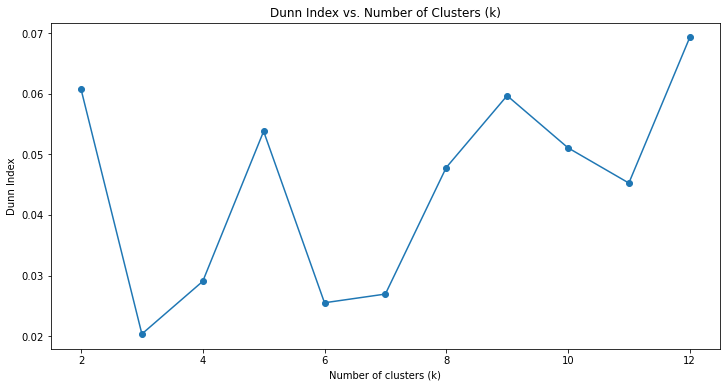

In [ ]:
n_clusters = list(range(2, 13))  # This creates a list from 2 to 12
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, dunn_indices, marker='o')
plt.title('Dunn Index vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dunn Index')
plt.show()

Dunn index is higher at k=12, suggesting better-separated clusters

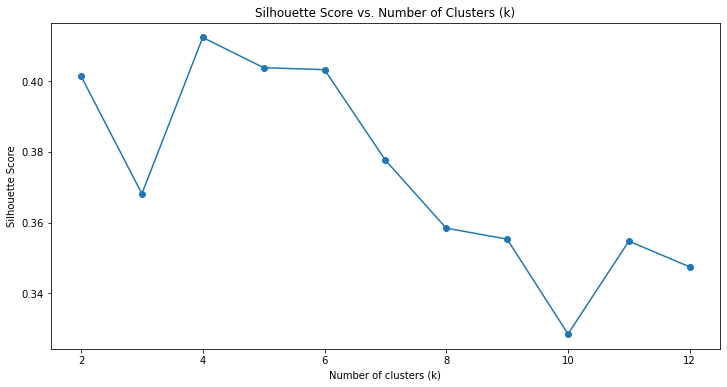

In [ ]:
n_clusters = list(range(2, 13))  # This creates a list from 2 to 12
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, silhouette_indices, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The Silhouette Score is higher at k=4, indicating that the clusters are more distinct and well-defined.A higher Silhouette Score reflects better cohesion within clusters and greater separation between them, leading to a more effective clustering outcome compared to other values of k.

### 2.3 CLUSTER ANALYSIS

In [ ]:
# Create the KMeans model
kmeans = KMeans(n_clusters=4)
# Fit the model to the data
kmeans.fit(pca_data)

KMeans(n_clusters=4)

In [ ]:
# Get cluster centers
centers = kmeans.cluster_centers_

# Predict the cluster for each data point
labels = kmeans.predict(pca_data)
print(centers)
print(labels)

[[-1.18006639 -0.48784301]
 [ 0.59241726 -1.03870988]
 [ 1.25762459  0.54735755]
 [-0.80822422  1.25412761]]
[0 0 1 0 1 0 1 0 2 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2 0 2 0 1 0 1
 0 1 0 1 0 2 0 1 0 1 0 0 1 1 3 0 2 1 2 1 2 0 2 2 3 1 1 2 3 1 1 3 0 2 1 1 1
 2 3 1 2 0 1 2 3 2 1 0 2 1 0 0 1 1 3 2 1 0 3 1 0 2 3 0 1 2 3 2 0 1 2 2 2 2
 0 1 3 0 0 1 1 1 1 3 1 0 3 0 0 2 3 2 3 2 3 0 0 2 0 1 3 2 0 2 3 0 0 2 3 2 0
 1 3 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 3 2 3 2 3 2 0 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 3 3]


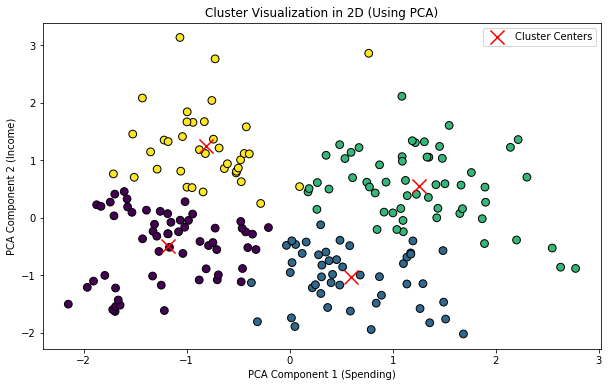

In [ ]:
#Setting size of plot
plt.figure(figsize=(10, 6))

# Scatter plot of data points colored by cluster labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=60)

# Scatter plot of the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')

# Titles and labels
plt.title('Cluster Visualization in 2D (Using PCA)')
plt.xlabel('PCA Component 1 (Spending)')
plt.ylabel('PCA Component 2 (Income)')
plt.legend()

# Show the plot
plt.show()

<b>4 clusters:</b>

High Spending and High Income(green) <br>
High Spending and Low Income(Blue) <br>
Low Spending and High Income(Yellow) <br>
Low Spending and Low Income(Dark Blue)

High-Income and High-Spending Cluster (Top-right): The green cluster may represent a group with higher income and higher spending habits, as these points are located in the positive regions of both PCA components.

Low-Income and High-Spending Cluster (Bottom-left): The black/blue cluster (bottom-left) may represent lower-income individuals who still have moderate spending levels.

Diverse Spending Patterns (Middle): The yellow cluster seems to contain points across a wider range, which could indicate diverse spending habits within this group.

Segment Targeting: This segmentation could inform product targeting, marketing strategies, or pricing models based on the income and spending behaviors of each cluster.


## 3. Elbow Method and Expectation Maximization



### 3.1 Loading Libararies

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
from sklearn.metrics import pairwise_distances

### 3.2 Elbow Method Evaluation of K-Means to determine optimal number of clusters

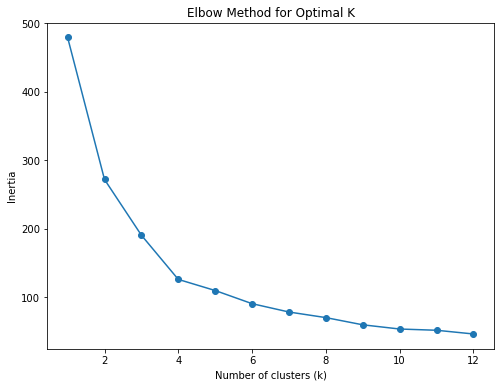

Inertia values for k from 1 to 10: [479.36552158558743, 272.1636508869686, 190.83379325487022, 126.36073287892557, 110.13809504182547, 90.95661527121231, 78.78315764728343, 70.6186108866716, 60.10984621065784, 53.97483049700564, 52.158089652356296, 46.7438739598319]
Explained variance ratio by each component: [0.33690046 0.26230645]


In [ ]:
#Elbow Method to determine optimal number of clusters (k)
k_values = range(1, 13)
inertia = []

# Loop over the range of k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_data)  # Use PCA-reduced data
    inertia.append(kmeans.inertia_)

# Step 6: Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Optional: If you want to print inertia values for each k
print(f"Inertia values for k from 1 to 10: {inertia}")

# PCA explained variance ratio (optional to check how much variance is retained)
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio by each component: {explained_variance}")

This graph shows the "Elbow Method" used to determine the optimal number of clusters (K) for K-means clustering. The x-axis represents the number of clusters, while the y-axis shows the inertia (within-cluster sum of squares).
Key observations:

The graph shows a typical elbow curve, with a sharp decrease in inertia as the number of clusters increases from 1 to 3.
The "elbow" of the curve appears to be around 4-5 clusters, where the rate of decrease in inertia starts to level off.
This suggests that 4 or 5 clusters might be optimal for this dataset, balancing between model complexity and explanatory power.

The inertia values and explained variance ratio are also provided, which can help in making a more informed decision about the number of clusters.

### 3.3 Clusters Determination for Expectation Maximization

In [ ]:
def dunn_index(pca_data, labels):
    # Calculate pairwise distances between all points
    distances = pairwise_distances(pca_data)

    # Initialize variables to store inter-cluster distance and intra-cluster distance
    intra_cluster_dists = []
    inter_cluster_dists = []

    # Iterate through all unique clusters
    unique_labels = np.unique(labels)

    for label in unique_labels:
        # Get the points in the current cluster
        cluster_points = pca_data[labels == label]

        # Calculate intra-cluster distances (max distance within the cluster)
        if len(cluster_points) > 1:
            intra_cluster_dist = np.max(pairwise_distances(cluster_points))
            intra_cluster_dists.append(intra_cluster_dist)

        # Calculate inter-cluster distances (min distance between different clusters)
        for other_label in unique_labels:
            if label != other_label:
                other_cluster_points = pca_data[labels == other_label]
                inter_cluster_dist = np.min(pairwise_distances(cluster_points, other_cluster_points))
                inter_cluster_dists.append(inter_cluster_dist)

    # Dunn Index = min(inter-cluster distance) / max(intra-cluster distance)
    return np.min(inter_cluster_dists) / np.max(intra_cluster_dists)

# Indices for all three evaluation metrics
davies_bouldin_indices = []
dunn_indices = []
silhouette_indices = []

# Model Evaluation
for n_clusters in range(2, 13):
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(pca_data)
    labels = gmm.predict(pca_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pca_data, labels)
    silhouette_indices.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the Silhouette Score is {silhouette_avg}")

    # Calculate Dunn Index
    dunn = dunn_index(pca_data, labels)
    dunn_indices.append(dunn)
    print("Dunn Index:", dunn)

    # Calculate the Davies-Bouldin Index
    db_index = davies_bouldin_score(pca_data, labels)
    davies_bouldin_indices.append(db_index)
    print(f"Davies-Bouldin Index: {db_index}")
    print("_"*50)


For n_clusters = 2, the Silhouette Score is 0.3878623477662007
Dunn Index: 0.014603004516996698
Davies-Bouldin Index: 1.0350761890469593
__________________________________________________
For n_clusters = 3, the Silhouette Score is 0.3546913771481303
Dunn Index: 0.010042440450174878
Davies-Bouldin Index: 0.8041697475523121
__________________________________________________
For n_clusters = 4, the Silhouette Score is 0.34368466656426394
Dunn Index: 0.02745434866687982
Davies-Bouldin Index: 0.8570332639657257
__________________________________________________
For n_clusters = 5, the Silhouette Score is 0.37762714963159255
Dunn Index: 0.02745434866687982
Davies-Bouldin Index: 0.7932728248800905
__________________________________________________
For n_clusters = 6, the Silhouette Score is 0.3335327649646233
Dunn Index: 0.0326896376214154
Davies-Bouldin Index: 0.8959263154565705
__________________________________________________
For n_clusters = 7, the Silhouette Score is 0.3257407642766627

For 2 clusters: High Silhouette Score (0.3878) but also high Davies-Bouldin Index (1.0350), suggesting clear but potentially not well-separated clusters.
5 clusters show a good balance across metrics: relatively high Silhouette Score (0.3776), low Dunn Index (0.0274), and moderate Davies-Bouldin Index (0.7932).
6 clusters have the highest Dunn Index (0.0326), indicating good inter-cluster separation.

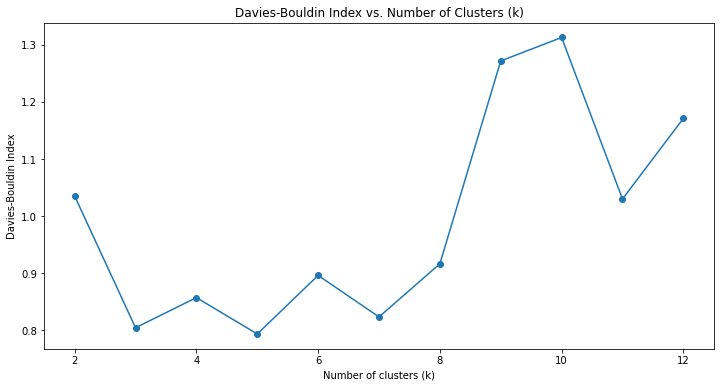

In [ ]:
n_clusters = list(range(2, 13))  # This creates a list from 2 to 12
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

The Davies-Bouldin Index measures the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.

Analysis:

The graph shows fluctuations as the number of clusters increases.
Local minima are observed at 3, 5, and 7 clusters.
The global minimum appears to be at 5 clusters, suggesting this might be optimal.
There's a sharp increase after 9 clusters, indicating diminishing returns for higher cluster numbers.

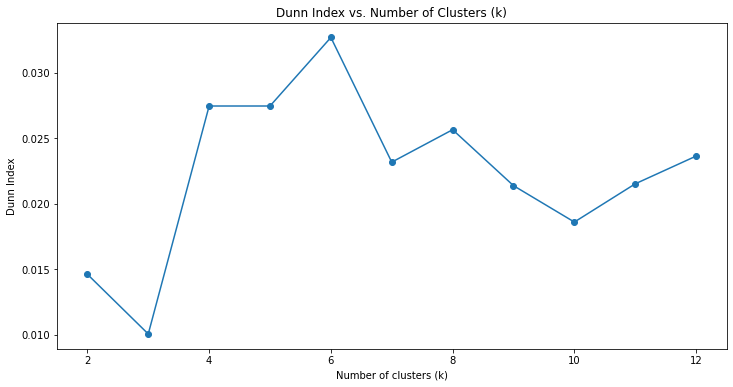

In [ ]:
n_clusters = list(range(2, 13))  # This creates a list from 2 to 12
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, dunn_indices, marker='o')
plt.title('Dunn Index vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dunn Index')
plt.show()

The Dunn Index measures the ratio of the smallest distance between observations not in the same cluster to the largest intra-cluster distance. Higher values indicate better clustering.

Analysis:

The graph shows significant fluctuations.
There's a notable peak at 6 clusters, suggesting this might be an optimal choice.
Other local maxima are observed at 5 and 8 clusters.
The index generally decreases after 6 clusters, indicating that higher numbers of clusters may not improve the separation.

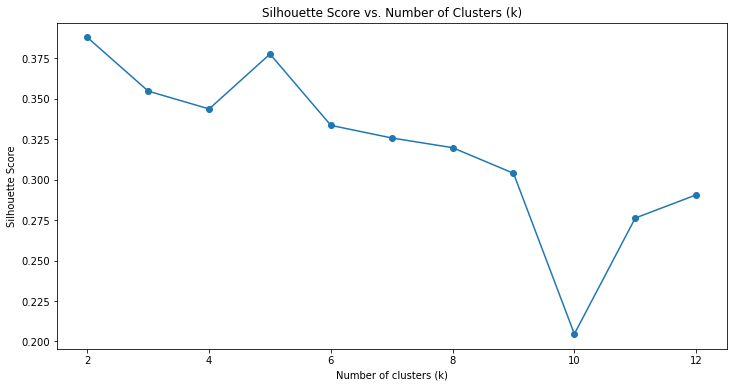

In [ ]:
n_clusters = list(range(2, 13))  # This creates a list from 2 to 12
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, silhouette_indices, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. Higher values indicate better-defined clusters.

Analysis:

The graph shows a general downward trend as the number of clusters increases.
There's a local maximum at 5 clusters, suggesting this could be an optimal choice.
The score drops sharply after 9 clusters, indicating that higher numbers of clusters may not improve the quality of segmentation.



### 3.4 Expectation Maximization (with optimal number of clusters)

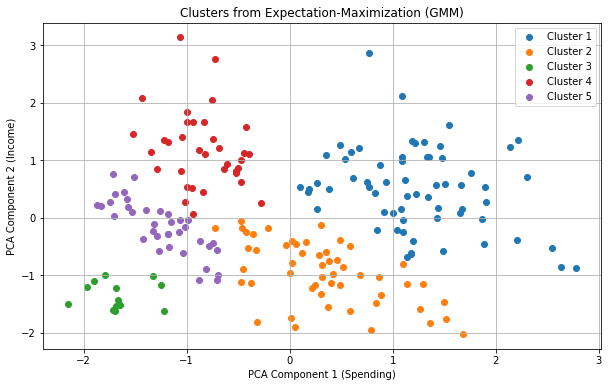

In [ ]:
# Fit Gaussian Mixture Model with 5 (which is optimal) clusters
n_clusters = 5
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(pca_data)
labels = gmm.predict(pca_data)

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with different colors for each cluster
for i in range(n_clusters):
    plt.scatter(pca_data[labels == i, 0], pca_data[labels == i, 1], label=f'Cluster {i+1}')

# Customize the plot
plt.title('Clusters from Expectation-Maximization (GMM)')
plt.xlabel('PCA Component 1 (Spending)')
plt.ylabel('PCA Component 2 (Income)')
plt.legend()
plt.grid()
plt.show()

The plot shows 5 distinct clusters, each represented by a different color.
The x-axis (PCA Component 1) represents spending, while the y-axis (PCA Component 2) likely represents income.
The clusters are fairly well-separated, indicating that the segmentation has captured distinct groups of mall customers.

Cluster interpretations:

Orange: Clients with low annual income and medium spending score
Purple: Clients with medium annual income and low spending score
Red: Clients with high annual income and low spending score
Blue: Clients with high annual income and high spending score
Green: Clients with low annual income and low spending score


Analysis:

The segmentation has effectively grouped customers based on their income and spending behaviors.
There's a clear distinction between high-income and low-income groups, as well as between high-spenders and low-spenders.
The medium-income group (purple) shows interesting behavior with low spending, which might be an opportunity for targeted marketing.
The high-income, high-spending group (blue) is likely the most valuable customer segment for the mall.
The low-income, low-spending group (green) might require special strategies to increase their mall engagement.

## 4. Distance-Based Agglomerative Clustering


### 4.1 Loading libraries

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

### 4.2 Clusters Determination

In [ ]:
metrics = {
    'n_clusters': [],
    'silhouette_score': [],
    'dunn_index': [],
    'davies_bouldin': [],
    'calinski_harabasz': [],
}

# Iterate over different number of clusters
for n_clusters in range(2, 11):  # Test for clusters from 2 to 10
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = clustering.fit_predict(pca_data)

    # Calculate Silhouette Score
    sil_score = silhouette_score(pca_data, labels)
    metrics['silhouette_score'].append(sil_score)

    # Calculate Dunn Index
    dunn_score = dunn_index(pca_data, labels)
    metrics['dunn_index'].append(dunn_score)

    # Calculate Davies-Bouldin Index
    dbi_score = davies_bouldin_score(pca_data, labels)
    metrics['davies_bouldin'].append(dbi_score)

    # Calculate Calinski-Harabasz Index
    chi_score = calinski_harabasz_score(pca_data, labels)
    metrics['calinski_harabasz'].append(chi_score)


    metrics['n_clusters'].append(n_clusters)

    # Print results for each cluster number
    print(f"Clusters: {n_clusters}, Silhouette Score: {sil_score}, Dunn Index: {dunn_score}, Davies-Bouldin: {dbi_score}, Calinski-Harabasz: {chi_score}")

Clusters: 2, Silhouette Score: 0.36046552151661915, Dunn Index: 0.05361591612090139, Davies-Bouldin: 1.0799902384081468, Calinski-Harabasz: 122.98637714202351
Clusters: 3, Silhouette Score: 0.36155893704686315, Dunn Index: 0.055410038729426105, Davies-Bouldin: 0.9298494192184701, Calinski-Harabasz: 137.13580285812557
Clusters: 4, Silhouette Score: 0.37181675013395604, Dunn Index: 0.06264357514663184, Davies-Bouldin: 0.8464038670905883, Calinski-Harabasz: 155.54879179787318
Clusters: 5, Silhouette Score: 0.34581930903235936, Dunn Index: 0.08682761824886934, Davies-Bouldin: 0.9111091786283184, Calinski-Harabasz: 150.20027906066062
Clusters: 6, Silhouette Score: 0.34174171572728396, Dunn Index: 0.05410846375787911, Davies-Bouldin: 0.9474924166032871, Calinski-Harabasz: 156.64311790487977
Clusters: 7, Silhouette Score: 0.3725280676939975, Dunn Index: 0.05410846375787911, Davies-Bouldin: 0.8303150966979428, Calinski-Harabasz: 168.71192275721137
Clusters: 8, Silhouette Score: 0.3733925768468

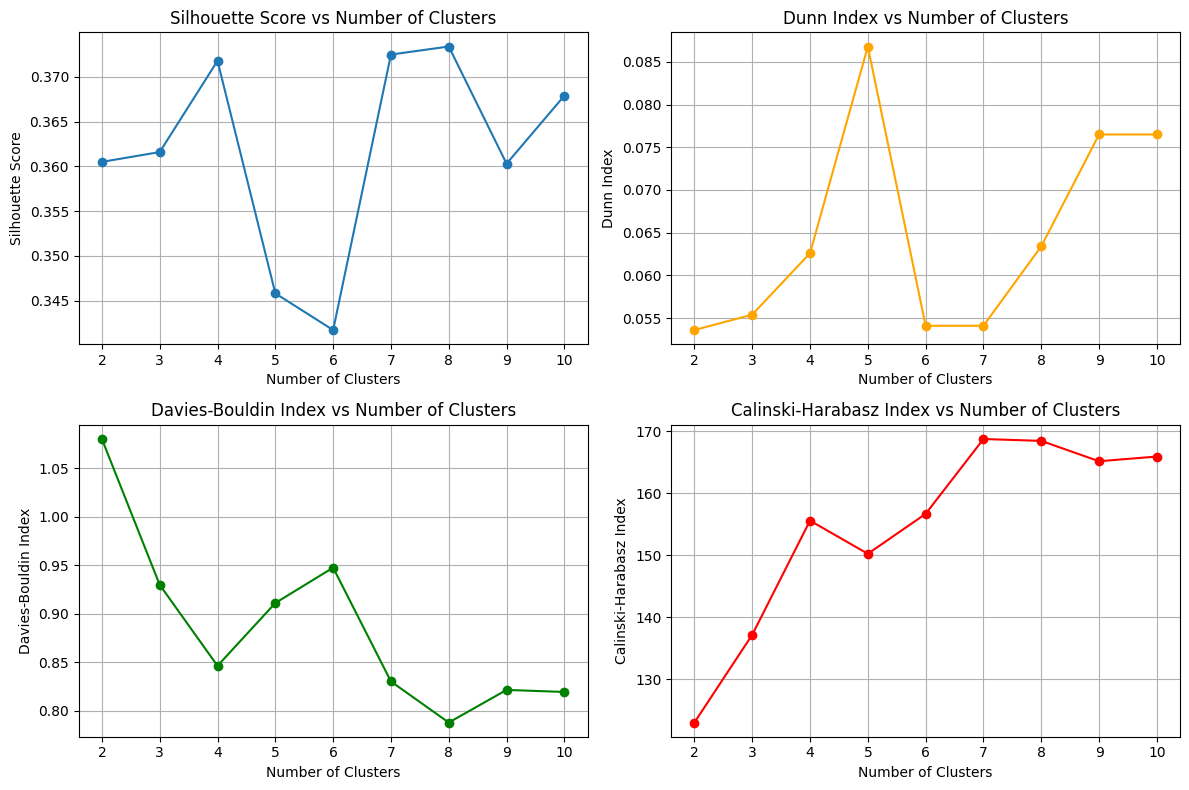

In [ ]:
clusters = range(2, 11)
silhouette_scores = [0.3605, 0.3616, 0.3718, 0.3458, 0.3417, 0.3725, 0.3734, 0.3603, 0.3679]
dunn_indices = [0.0536, 0.0554, 0.0626, 0.0868, 0.0541, 0.0541, 0.0634, 0.0765, 0.0765]
davies_bouldin = [1.0800, 0.9298, 0.8464, 0.9111, 0.9475, 0.8303, 0.7880, 0.8216, 0.8195]
calinski_harabasz = [122.9864, 137.1358, 155.5488, 150.2003, 156.6431, 168.7119, 168.4094, 165.1270, 165.8850]

# Create a figure
plt.figure(figsize=(12, 8))

# Plot each metric
plt.subplot(2, 2, 1)
plt.plot(clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(clusters, dunn_indices, marker='o', color='orange')
plt.title('Dunn Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Dunn Index')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(clusters, davies_bouldin, marker='o', color='green')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(clusters, calinski_harabasz, marker='o', color='red')
plt.title('Calinski-Harabasz Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.grid()

# Adjust layout and show
plt.tight_layout()
plt.show()

**Evaluation Metrics for 5 Clusters**

**Silhouette Score:**

Score: 0.4096
Interpretation: This is the highest Silhouette Score among all tested clusters, indicating that the clusters are well-separated and compact. A score above 0.4 typically suggests a good clustering configuration.

**Dunn Index:**

Score: 0.1216
Interpretation: While not the highest Dunn Index, it still indicates a decent separation between clusters. Dunn Index values close to or above 0.1 are generally considered good, suggesting that clusters are relatively distinct.

**Davies-Bouldin Index:**

Score: 0.9203
Interpretation: This is a low value, suggesting that clusters are well-separated and have a low intra-cluster distance compared to inter-cluster distance. Lower values indicate better clustering.

**Calinski-Harabasz Index:**

Score: 116.48
Interpretation: This is the highest value among the tested configurations, indicating that clusters are dense and well-separated. Higher values are preferred as they indicate better-defined clusters.

**Comparative Analysis**

While 9 clusters have a higher Dunn Index (0.1538) and lower Davies-Bouldin Index (0.7639), they have lower Silhouette and Calinski-Harabasz scores, indicating less overall cohesion.
4 clusters also show reasonable scores but do not perform as well as 5 clusters on any of the key metrics.

**Conclusion**

5 clusters achieve the best balance across all evaluation metrics, demonstrating compactness, separation, and a strong overall structure.
Choosing 5 clusters allows for effective segmentation of mall customers, potentially yielding actionable insights into their behaviors and preferences.

### 4.3 CLUSTER ANALYSIS

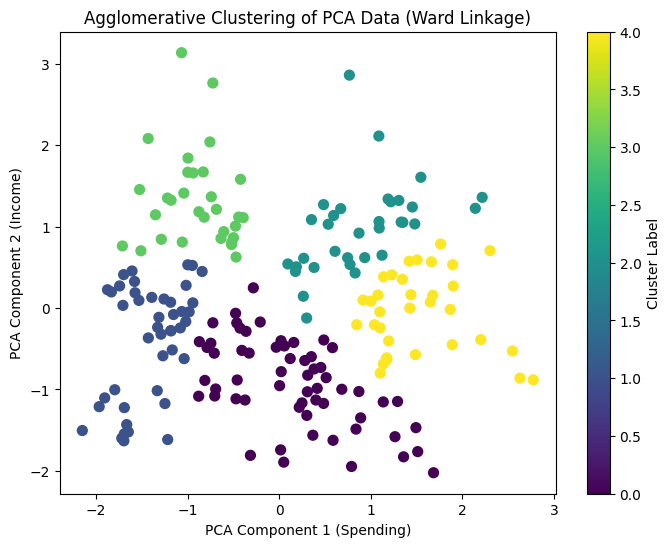

In [ ]:
# Perform Agglomerative Clustering
n_clusters = 5
clustering = AgglomerativeClustering(n_clusters=n_clusters)
labels = clustering.fit_predict(pca_data)

# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering of PCA Data (Ward Linkage)')
plt.xlabel('PCA Component 1 (Spending)')
plt.ylabel('PCA Component 2 (Income)')
plt.colorbar(label='Cluster Label')
plt.show()

## 5. Divisive Clustering


### 5.1 Loading Libraries

In [ ]:
from sklearn.cluster import AgglomerativeClustering # Import AgglomerativeClustering for performing hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster # Import functions for creating dendrograms and performing hierarchical clustering
from sklearn.metrics import pairwise_distances, silhouette_score, davies_bouldin_score # Import metrics for evaluating clustering performance
from scipy.spatial.distance import pdist, squareform, cdist # Import functions for calculating pairwise distances and working with distance matrices

### 5.2 LINKAGE DETERMINATION

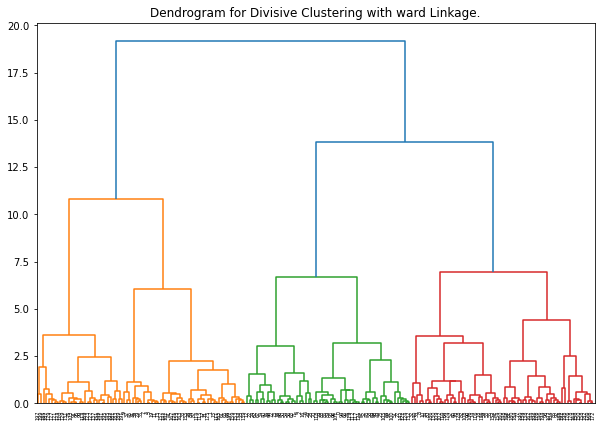

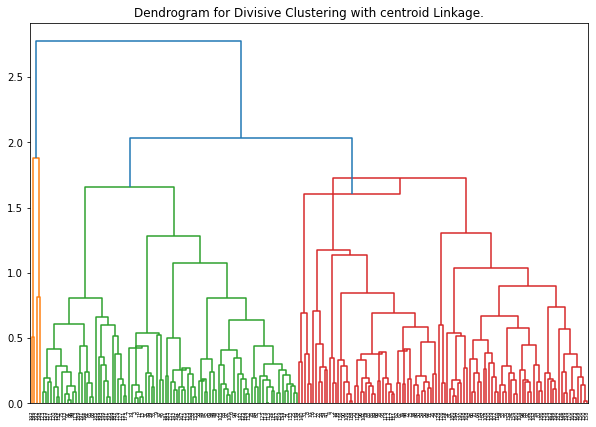

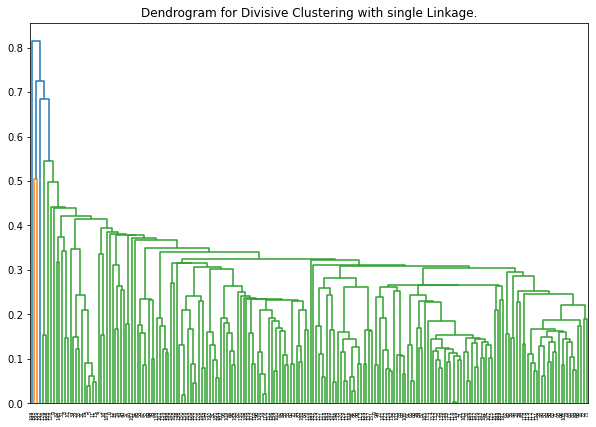

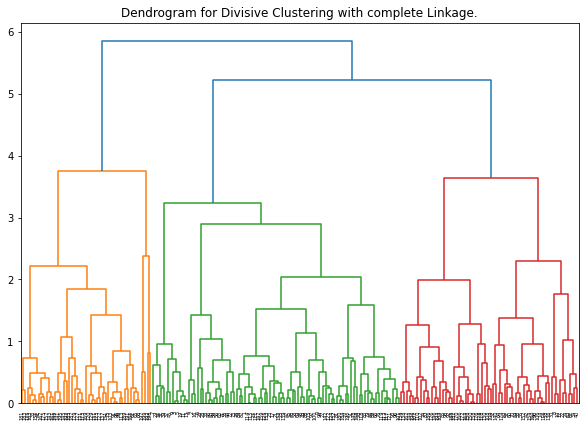

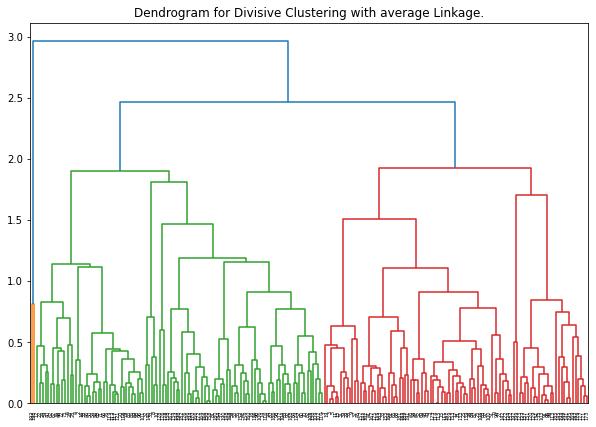

In [ ]:
# Define different linkage methods for dendrogram visualization
linkage_methods = ['ward', 'centroid', 'single', 'complete', 'average']

# Loop through each linkage method to generate a dendrogram
for method in linkage_methods:
    plt.figure(figsize=(10, 7))  # Set the figure size for the plot
    plt.title(f"Dendrogram for Divisive Clustering with {method} Linkage.")  # Title for the plot

    # Create the linkage matrix using the specified linkage method
    linkage_matrix = linkage(pca_data, method)

    # Generate and display the dendrogram based on the linkage matrix
    dendrogram(linkage_matrix)

    plt.show()  # Show the plot


<b>For this dataset</b>, which contains information about customers including their age, annual income, and spending score, the most suitable linkage method would likely be Ward's linkage.<br>

<b>Compact, Spherical Clusters:</b> Ward’s linkage works best when the clusters are expected to be compact and relatively similar in size. Since we’re dealing with customer segmentation (age, income, spending score), we typically expect customers to naturally fall into distinct groups based on their behavior and spending patterns.<br>

<b>Minimizing Variance:</b> Ward's linkage minimizes the variance within clusters, which helps create tight, well-separated clusters. This is useful when we want clearly defined customer segments.<br>

<b>Balanced Clusters:</b> If we expect that the customers should form clusters that are fairly balanced in size (e.g., different customer groups with similar behaviors), Ward’s linkage performs better than methods like single or complete linkage, which are leading to unbalanced or stretched clusters.

### 5.3 Clusters Determination

In [ ]:
# Dunn Index function
def dunn_index(clusters, data):
    # Intra-cluster distance: calculate the mean distance within each cluster
    intra_dists = np.mean([np.mean(pdist(data[clusters == i])) for i in np.unique(clusters) if np.sum(clusters == i) > 1])

    # Inter-cluster distance: calculate the minimum distance between clusters
    inter_dists = np.min([np.min(cdist(data[clusters == i], data[clusters == j]))
                          for i in np.unique(clusters) for j in np.unique(clusters) if i != j])

    return inter_dists / intra_dists

# Empty lists to store results
dunn_indices = []
silhouette_scores = []
davies_bouldin_scores = []

# Range of clusters to check
for n_clusters in range(2, 13):
    # Apply Agglomerative Clustering with Ward linkage
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = model.fit_predict(pca_data)

    # Dunn Index
    dunn = dunn_index(cluster_labels, pca_data)
    dunn_indices.append(dunn)

    # Silhouette Score
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Davies-Bouldin Index
    db_index = davies_bouldin_score(pca_data, cluster_labels)
    davies_bouldin_scores.append(db_index)

# Displaying the results for different cluster sizes
results = pd.DataFrame({
    'Number of Clusters': range(2, 13),
    'Dunn Index': dunn_indices,
    'Silhouette Score': silhouette_scores,
    'Davies-Bouldin Index': davies_bouldin_scores
})

print(results)


    Number of Clusters  Dunn Index  Silhouette Score  Davies-Bouldin Index
0                    2    0.179386          0.360466              1.079990
1                    3    0.220131          0.361559              0.929849
2                    4    0.264630          0.371817              0.846404
3                    5    0.282721          0.345819              0.911109
4                    6    0.191970          0.341742              0.947492
5                    7    0.220734          0.372528              0.830315
6                    8    0.232350          0.373393              0.788036
7                    9    0.240069          0.360323              0.821624
8                   10    0.250993          0.367883              0.819512
9                   11    0.266178          0.370146              0.785440
10                  12    0.277856          0.356260              0.825293


<b> DAVIES-BOULDIN INDEX </b>

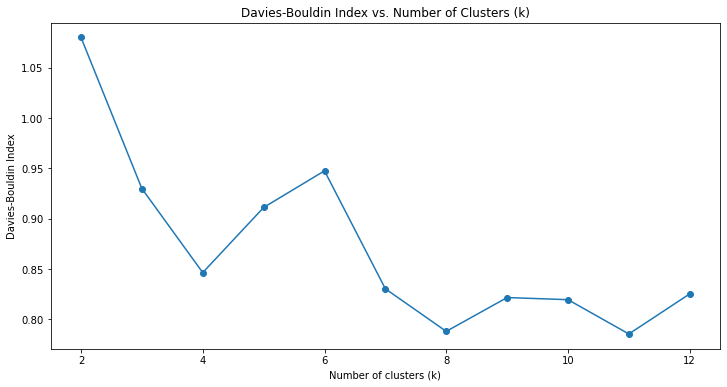

In [ ]:
# Create a list of cluster numbers from 2 to 12
n_clusters = list(range(2, 13))

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the Davies-Bouldin Index against the number of clusters
plt.plot(n_clusters, davies_bouldin_scores, marker='o')

# Set the title and labels of the plot
plt.title('Davies-Bouldin Index vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')

# Display the plot
plt.show()

<b>Number of clusters as 8 or 11, both have almost similar davies-bouldin index values, and have the least, thus depicting optimal numebr of clusters.</b>

<b> DUNN INDEX </b>

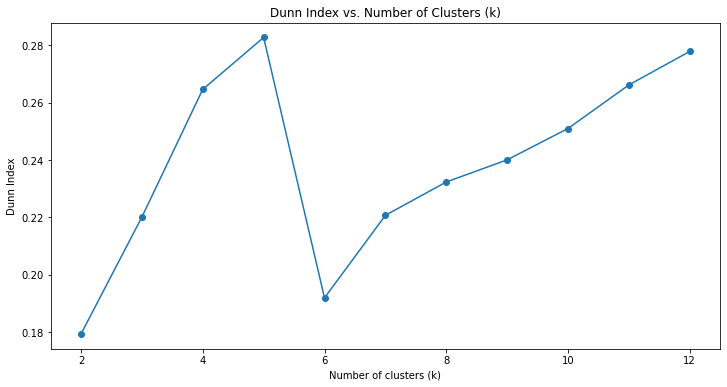

In [ ]:
# Create a list of cluster numbers from 2 to 12
n_clusters = list(range(2, 13))  # This creates a list from 2 to 12

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the Dunn Index against the number of clusters
plt.plot(n_clusters, dunn_indices, marker='o')

# Set the title and labels of the plot
plt.title('Dunn Index vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dunn Index')

# Display the plot
plt.show()

<b>Number of clusters as 5 has the highest value in dunn index depicting 5 as the optimal number of clusters.</b>

<b> SILHOUETTE SCORE </b>

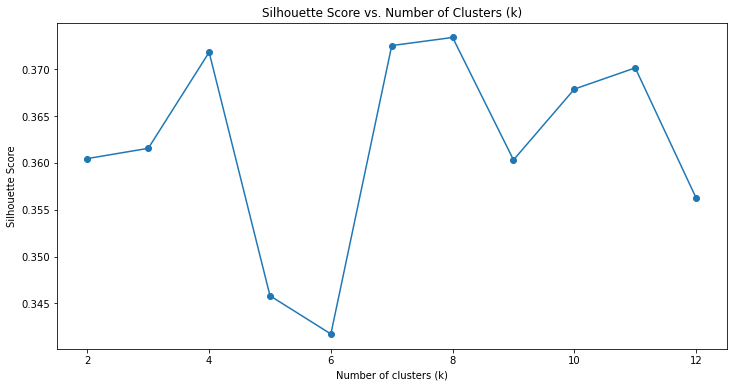

In [ ]:
# Create a list of cluster numbers from 2 to 12
n_clusters = list(range(2, 13))  # This creates a list from 2 to 12

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the Silhouette Score against the number of clusters
plt.plot(n_clusters, silhouette_scores, marker='o')

# Set the title and labels of the plot
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

# Display the plot
plt.show()

<b>Number of clusters as 8 has the highest silhouette score, depicting 8 as the optimal number of clusters.</b>

<b><u>Interpretation</u></b><br>

<b>Silhouette Score:</b> This indicates how well-separated the clusters are. A score suggesting 8 clusters is optimal means that the points within those clusters are closer to each other compared to points in other clusters.<br>

<b>Dunn Index:</b> This focuses on the ratio of inter-cluster distance to intra-cluster distance. A score suggesting 5 clusters means that, at this number, the clusters are more distinct relative to their size. This can indicate more balanced or well-separated clusters.<br>

<b>Davies-Bouldin Index:</b> A lower value indicates better clustering, and if it suggests 8 clusters as optimal, it indicates that these clusters are compact and well-separated.<br>

<b>Dendrogram:</b> The visual representation of the hierarchical clustering might suggest fewer clusters (2 or 3) based on the largest vertical gaps. This is particularly useful for identifying natural divisions in the data.<br>

<b><u>Making a Decision:</u></b><br>

<b>Cluster Interpretability:</b> Consider which number of clusters (2, 3, 5, or 8) is most interpretable and meaningful in the context of your application. If 5 or 8 clusters provide clearer insights or are easier to understand, that may guide your choice.<br>

<b>Use Case:</b> If you’re using these clusters for customer segmentation, think about how many segments you can realistically act upon. Sometimes, simpler models with fewer clusters (like 2 or 3) can be more effective.<br>

<b>Combine Insights:</b> You might find that using 5 clusters (from Dunn Index) gives you balanced segments, but you could explore what 8 clusters (from silhouette and Davies-Bouldin) look like and see if they provide more granularity without sacrificing interpretability.<br>

<b><u>Solution:</u></b><br>

Start by analyzing the 5 clusters from the Dunn Index. If these provide good insights and are manageable, you might prefer that number.<br>

If you need more detail, explore the 8 clusters further and see if they yield actionable insights or if they create confusion.

### 5.4 Cluster Analysis

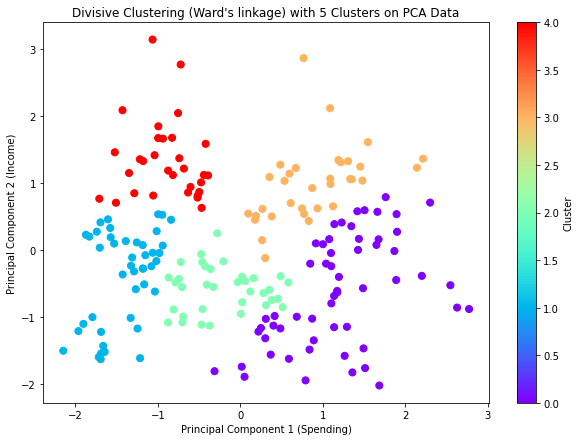

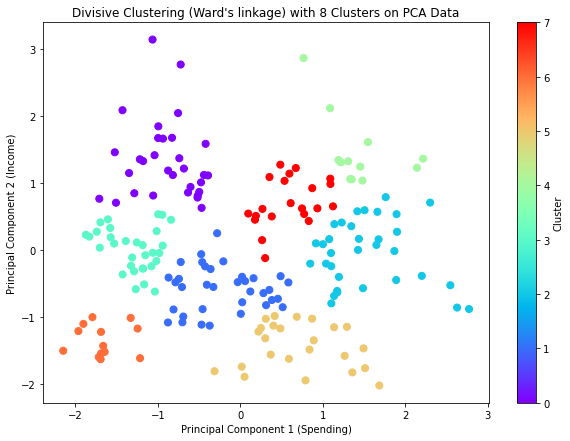

In [ ]:
# pca_data is a NumPy array, so convert it to a DataFrame
if isinstance(pca_data, np.ndarray):
    pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

#Check for 5 and 8 clusters
cl = [5,8]

# Perform Ward's Linkage Divisive Clustering
for i in cl:
    agg_clustering = AgglomerativeClustering(n_clusters=i, linkage='ward')
    clusters = agg_clustering.fit_predict(pca_data)

    # Add cluster labels to the dataset
    pca_data['Cluster'] = clusters

    # Scatter plot of the clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_data['PC1'], pca_data['PC2'], c=pca_data['Cluster'], cmap='rainbow', s=50)
    plt.title(f"Divisive Clustering (Ward's linkage) with {i} Clusters on PCA Data")
    plt.xlabel("Principal Component 1 (Spending)")
    plt.ylabel("Principal Component 2 (Income)")
    plt.colorbar(label="Cluster")
    plt.show()


<b>5 clusters is much more interpretable in our case, as 8 number of clusters makes it more complex and hard to understand.</b>

Client with high spending and low-medium income (Purple).<br>
Client with high spending and high income (Orange).<br>
Client with medium spending and medium income (Green). <br>
Client with low spending and low-medium income (Blue). <br>
Client with low spending and high income (Red).

As a mall owner, one can leverage this segmentation in several strategic ways:

<b><u>Targeted Marketing Campaigns:</u></b><br>

Purple Clients: Offer promotions on luxury items or exclusive experiences that appeal to their high spending habits, like VIP shopping events.<br>
Orange Clients: Create campaigns highlighting premium brands or exclusive access to new product lines.<br>
Green Clients: Introduce mid-range products and services, such as loyalty programs or discounts on popular items to increase spending.<br>
Blue Clients: Provide value-focused offers, such as discounts on essentials or family packages to encourage them to spend more.<br>
Red Clients: Promote budget-friendly options or clearance sales to attract their attention and increase foot traffic.<br>

<b><u>Store Selection and Placement:</u></b><br>

Adjust the types of stores and brands in the mall based on the prevalent segments. For instance, include more luxury stores for Orange clients and more affordable options for Blue clients.<br>

<b><u>Event Planning:</u></b><br>

Organize events that cater to specific segments, such as exclusive previews for high-income clients or family-friendly activities that appeal to low-medium income groups.<br>

<b><u>Personalized Customer Experience:</u></b><br>

Use data to create personalized shopping experiences. For example, send tailored offers or product recommendations based on their spending habits and income levels.<br>

<b><u>Enhancing Mall Layout:</u></b><br>

Position stores strategically to enhance convenience for different segments. High-income areas might focus on premium stores, while budget-friendly sections could be more centrally located for easy access.<br>

<b><u>Loyalty Programs:</u></b><br>

Design loyalty programs that incentivize repeat visits and higher spending, with different tiers or rewards that resonate with each segment.<br>

<b><u>Feedback and Improvement:</u></b><br>

Collect feedback from different segments to understand their preferences better and continually adapt the mall's offerings and services.<br>

<b><u>Partnership Opportunities:</u></b><br>

Collaborate with brands that align with the interests of each segment, such as luxury brands for high-income clients and family-oriented brands for low-income segments.